In [1]:
import os
import json
import uuid
import random

import numpy as np
import cv2
from matplotlib import pyplot as plt
from collections import defaultdict

In [107]:
os.mkdir(os.path.join(os.getcwd(), 'data', 'LarsDataset'))
os.mkdir(os.path.join(os.getcwd(), 'data', 'LarsDataset', 'images'))
os.mkdir(os.path.join(os.getcwd(), 'data', 'LarsDataset', 'images', "train"))

os.mkdir(os.path.join(os.getcwd(), 'data', 'LarsDataset', 'labels'))
os.mkdir(os.path.join(os.getcwd(), 'data', 'LarsDataset', 'labels', "train"))

In [18]:
def plot_bbox(im, bbox, label, color=(0,255,0), thickness=2, show=True):
    # Plots a bounding box given the coordinates of the top left and bottom right corners
    x0, y0, x1, y1 = bbox
    cv2.rectangle(im,(x0,y0),(x1,y1),color,thickness)
    cv2.putText(im,label,(x0, y0 - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,[225, 255, 255],thickness=2)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    if show:
        plt.imshow(im)
        plt.show()
    return im

In [109]:
folders = ['train', 'val']

category_frequency = defaultdict(int)

for folder in folders:
    with open(os.path.join(os.getcwd(), 'data', 'lars_v1-2', folder, 'panoptic_annotations.json'), 'r') as f:
        annotations_file = json.load(f)["annotations"]
    
    for annotation in annotations_file:
        annotation["file_name"] = annotation["file_name"].replace("png", "jpg")

    annotation_file_names = [ann['file_name'] for ann in annotations_file]
    assert (len(annotations_file) == len(set(annotation_file_names)))

    images = os.listdir(os.path.join(os.getcwd(), 'data', 'lars_v1', folder, 'images'))
    random.shuffle(images)

    for image in images:
        assert image in annotation_file_names

        unique_name = str(uuid.uuid4())

        annotation_image = [ann for ann in annotations_file if ann['file_name'] == image][0]['segments_info']
        annotation_lines = []
        for annotation in annotation_image:
            if annotation['category_id'] not in  [11,12,13,14,15,16,17,19]:
                continue

            if annotation['category_id'] in [11, 12]:
                category = 0
            else :
                category = 1
            
            x0, y0, w, h = annotation['bbox']
            img = cv2.imread(os.path.join(os.getcwd(), 'data', 'lars_v1', folder, 'images', image))
            im_width, im_height = img.shape[1], img.shape[0]

            # do not add annotations that are less than 3% of the image width or height
            if w < 7 or h < 7:
                continue

            # print(annotation)
            # i = cv2.imread(os.path.join(os.getcwd(), 'data', 'lars_v1', folder, 'images', image))
            # print(type(i))
            # x0, y0, x1, y1 = x0, y0, x0 + w, y0 + h
            # plot_bbox(i, [x0, y0, x1, y1], str(category))

            annotation_lines.append(f"{category} {(x0+w/2)/im_width} {(y0+h/2)/im_height} {w/im_width} {h/im_height}\n")

        if len(annotation_lines) == 0:
            continue
            
        with open(os.path.join(os.getcwd(), 'data', 'LarsDataset', 'labels', 'train', unique_name + '.txt'), 'w') as f:
            for line in annotation_lines:
                f.write(line)
        
        os.system(f"cp {os.path.join(os.getcwd(), 'data', 'lars_v1', folder, 'images', image)} {os.path.join(os.getcwd(), 'data', 'LarsDataset', 'images', 'train', unique_name + '.jpg')}")

        # for annotation in annotation_image['segments_info']:


f1865a38-29e4-49fe-97a6-694b75794307.jpg
0 0.14401041666666667 0.3768518518518518 0.0421875 0.2796296296296296
0 0.4234375 0.475462962962963 0.03333333333333333 0.049074074074074076
0 0.503125 0.5023148148148148 0.046875 0.05462962962962963
0 0.24270833333333333 0.48009259259259257 0.007291666666666667 0.025
0 0.19348958333333333 0.49398148148148147 0.0234375 0.013888888888888888
0 0.7552083333333334 0.4740740740740741 0.005208333333333333 0.014814814814814815


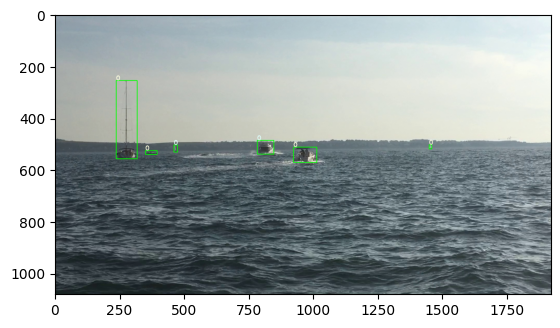

In [122]:
# choose a random image from the CombinedDatasetsChallenge folder and plot the bounding box
datafolder = os.path.join(os.getcwd(), 'data', 'LarsDataset')
filename = random.choice(os.listdir(os.path.join(datafolder,  'images', 'train')))

print(filename)
image = cv2.imread(os.path.join(datafolder, 'images', 'train', filename))
labels = open(os.path.join(datafolder, 'labels', 'train', filename.split('.')[0]+".txt"), 'r').readlines()

for label in labels:
    label = label.strip()
    print(label)
    classLabel, x0, y0, x1, y1 = label.split(' ')[:5]
    x0, y0, x1, y1 = float(x0), float(y0), float(x1), float(y1)
    x0, y0, x1, y1 = x0*image.shape[1], y0*image.shape[0], x1*image.shape[1], y1*image.shape[0]

    box = np.array([x0-x1/2, y0-y1/2,x0+x1/2, y0+y1/2,], dtype = np.float32)
    box = box.round().astype(np.int32).tolist()
    image = plot_bbox(image, box, classLabel, show=False)
_=plot_bbox(image, box, classLabel)


In [110]:
!ls data/LarsDataset/images/train | wc -l
!ls data/lars_v1/train/images | wc -l

    2134
    2605
